#### IMPORTING LIBRARIES

In [1]:
#imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
#ignore warnings
warnings.filterwarnings("ignore")
#seting style as whitegrid
sns.set_style("whitegrid")

#### DATA EXPLORATION

In [2]:
#import dataset
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
train

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671
...,...,...,...,...,...,...,...,...,...
3501,1323,ds,2007,role-playing,Square Enix,E10+,1.702128,0.065421,3.584264
3502,2862,3ds,2018,action,Nintendo,E10+,3.625000,0.090000,2.701472
3503,1980,ps3,2012,action,Warner Bros. Interactive Entertainment,E10+,2.814815,0.172917,1.631668
3504,3065,3ds,2016,simulation,Marvelous Entertainment,E10+,2.571429,0.464286,2.899156


In [3]:
test

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS
0,4310,ps2,2008,action,Tecmo Koei,T,3.928571,0.482353
1,4011,psp,2007,strategy,Atari,E10+,5.538462,0.071795
2,2185,ps2,2004,shooter,Electronic Arts,T,3.034483,0.062044
3,1644,x,2006,action,Electronic Arts,E,2.913043,0.880000
4,188,3ds,2011,racing,Ubisoft,E10+,1.162162,0.183333
...,...,...,...,...,...,...,...,...
1498,3939,ps2,2004,sports,Electronic Arts,T,1.809524,0.192308
1499,961,ds,2007,platform,Take-Two Interactive,E,8.800000,0.625000
1500,3417,xone,2016,action,Insomniac Games,E,5.500000,0.333333
1501,2489,ps,2002,racing,Electronic Arts,E,8.625000,0.690000


In [4]:
print('train_info',train.info())
print('test_info',test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506 entries, 0 to 3505
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3506 non-null   int64  
 1   CONSOLE          3506 non-null   object 
 2   YEAR             3506 non-null   int64  
 3   CATEGORY         3506 non-null   object 
 4   PUBLISHER        3506 non-null   object 
 5   RATING           3506 non-null   object 
 6   CRITICS_POINTS   3506 non-null   float64
 7   USER_POINTS      3506 non-null   float64
 8   SalesInMillions  3506 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 246.6+ KB
train_info None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1503 non-null   int64  
 1   CONSOLE         1503 non-null   object 
 2   YEAR            1

##### NULL VALUES

In [5]:
print('null_values train?',train.isnull().sum())
print('null values test',test.isnull().sum())

null_values train? ID                 0
CONSOLE            0
YEAR               0
CATEGORY           0
PUBLISHER          0
RATING             0
CRITICS_POINTS     0
USER_POINTS        0
SalesInMillions    0
dtype: int64
null values test ID                0
CONSOLE           0
YEAR              0
CATEGORY          0
PUBLISHER         0
RATING            0
CRITICS_POINTS    0
USER_POINTS       0
dtype: int64


#### EXPLORATORY DATA ANAYSIS

##### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F0581D748>,
      dtype=object)

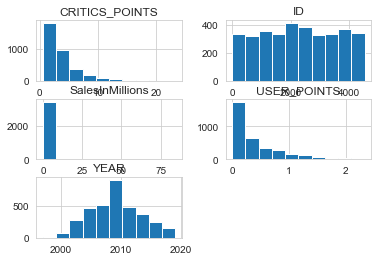

In [5]:
#univariate analysis
train.hist()

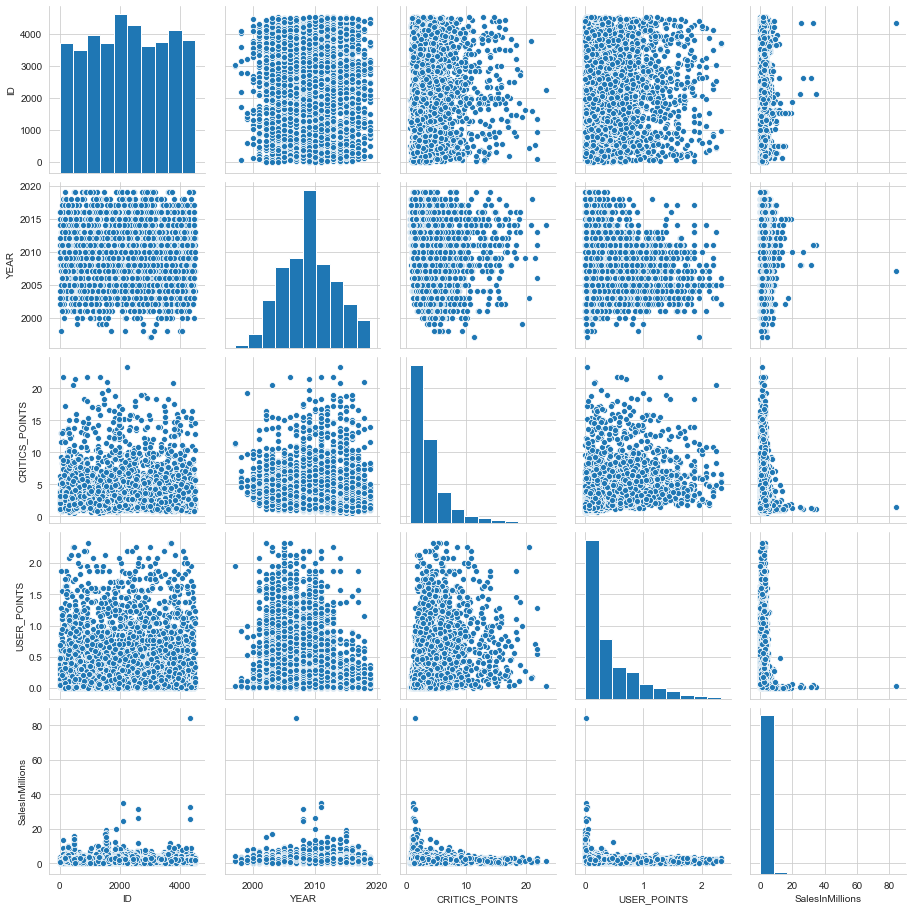

In [6]:
sns.pairplot(train)

###### Outliers:In salesinmillions there is only one value above 8 million.Also its rating critics &_points user_points suggest that such a high value is not possible.Therefore droping this particular row.

In [7]:
train[train['SalesInMillions']>80]

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
1036,4344,wii,2007,sports,Nintendo,E,1.490196,0.024691,84.226041


In [8]:
train=train[train['SalesInMillions']<80]

##### Outlier Detection

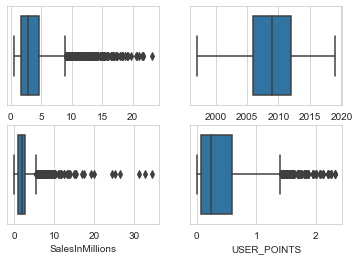

In [9]:
#for detecting outliers
fig, axs = plt.subplots(2, 2)
sns.boxplot(train['CRITICS_POINTS'],ax=axs[0][0])
sns.boxplot(train['YEAR'],ax=axs[0][1])
sns.boxplot(train['SalesInMillions'],ax=axs[1][0])
sns.boxplot(train['USER_POINTS'],ax=axs[1][1])


##### Correlation plot

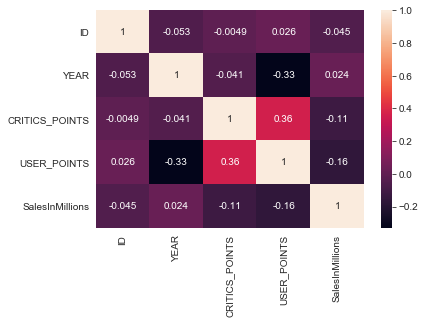

In [10]:
sns.heatmap(train.corr(),annot=True)

###### Console vs SalesInMillions

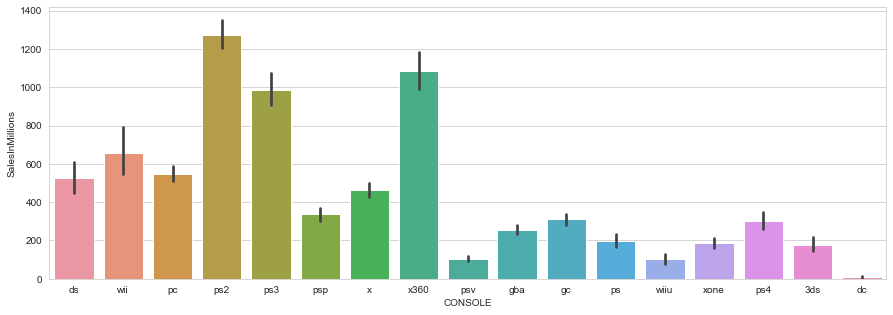

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x='CONSOLE',y='SalesInMillions',data=train,estimator=sum)

###### Consoles(top 3) with highest total  sales in the span of 24 years are ps2,x360,ps3

In [11]:
cy=train.groupby(['CONSOLE','YEAR']).sum()
cy.head()

ID  CRITICS_POINTS  USER_POINTS  SalesInMillions
CONSOLE YEAR                                                     
3ds     2011  25127       44.809035     4.582315        19.328690
        2012  24558       45.065228     0.699679        30.851861
        2013  32805       35.707904     2.923092        26.433229
        2014  36331       65.351015     5.773621        40.048185
        2015  26309       91.189026     3.457576        24.488928

##### Year with highest overall sales in gaming industry

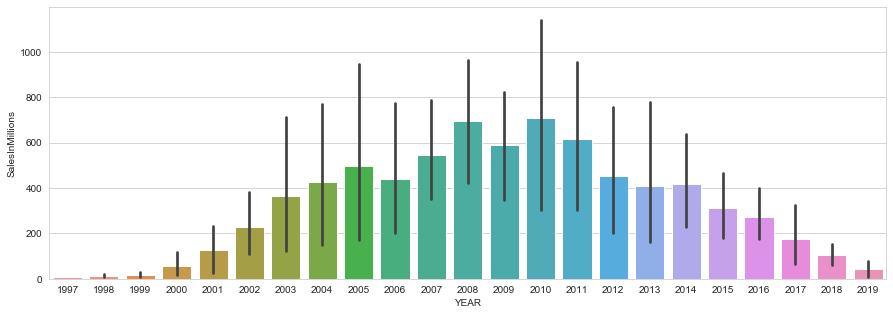

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(y='SalesInMillions',x=cy.index.get_level_values(1),data=cy,estimator=sum)

##### For the gaming industry the sales were at it's peak in 2010.

##### Console with highest critics points

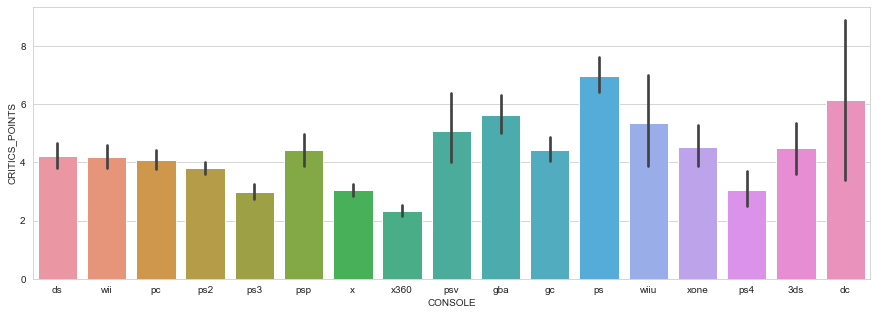

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x='CONSOLE',y='CRITICS_POINTS',data=train)

##### According to the critics the best console is ps whereas x360  received very low critic points.This shows that critics were not statisfied much with x360 console.

##### Which console was user favourite?

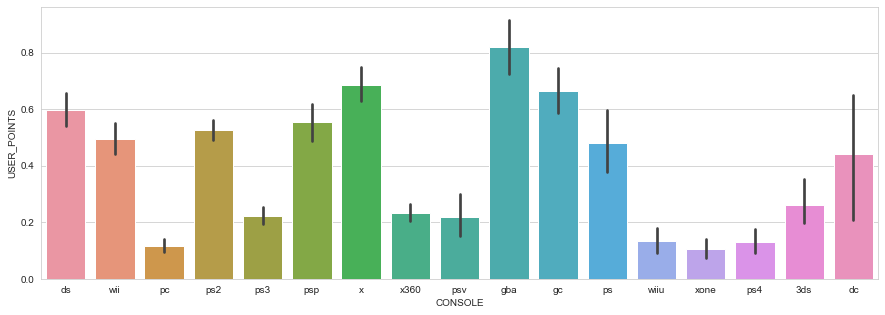

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x='CONSOLE',y='USER_POINTS',data=train)

##### gba console was user favourite whereas xone recieved very low user ratings.Even though ps was the highest rated console according to the critics it didn't recieve very high user ratings.

##### Console vs Ratings

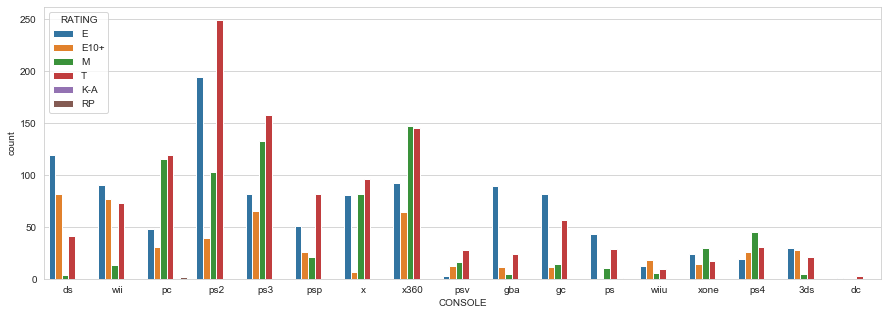

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(train['CONSOLE'],hue=train['RATING'])

##### Majority of the consoles have T or E rating.Which means that majority of the consoles are suitable for age group 13 and above(T) and 6 and above(E)

##### Does Rating affect the Sales?

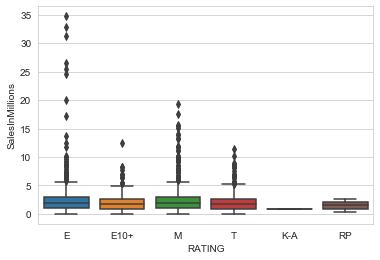

In [48]:
sns.boxplot(y=train['SalesInMillions'],x=train['RATING'])

##### The median for all ratings is around 2.5M which shows that ratings doesnt play a significant role in determining Sales in millions

##### Which category has highest overall sales?

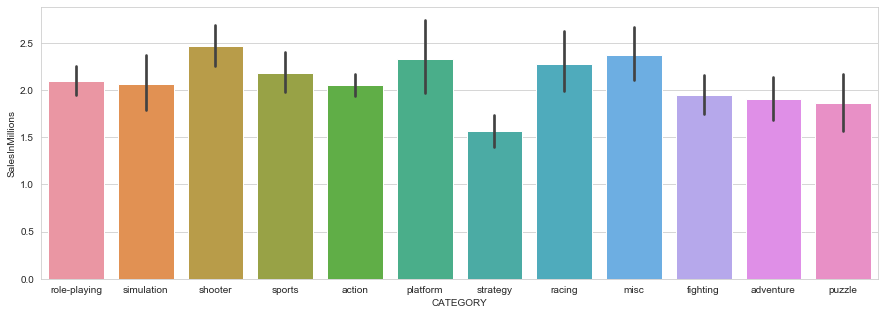

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(x=train['CATEGORY'],y=train['SalesInMillions'])

##### Category with highest overall  sales is shooter (2.5M sales)

##### Category vs Critic points

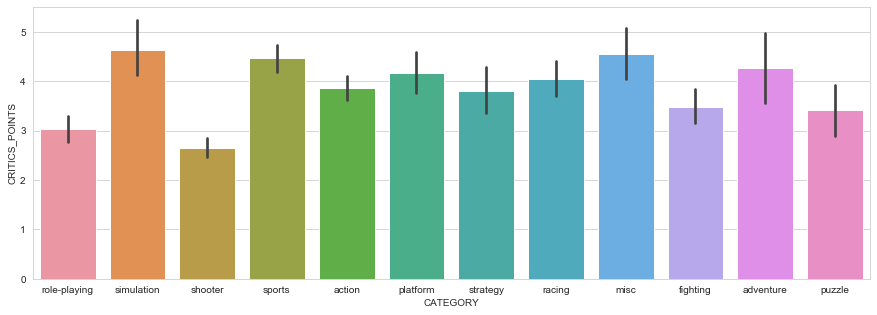

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x=train['CATEGORY'],y=train['CRITICS_POINTS'])

##### Simulation category received high critic points across various consoles.Whereas shooter category received very low critics points.

##### Category vs User_points

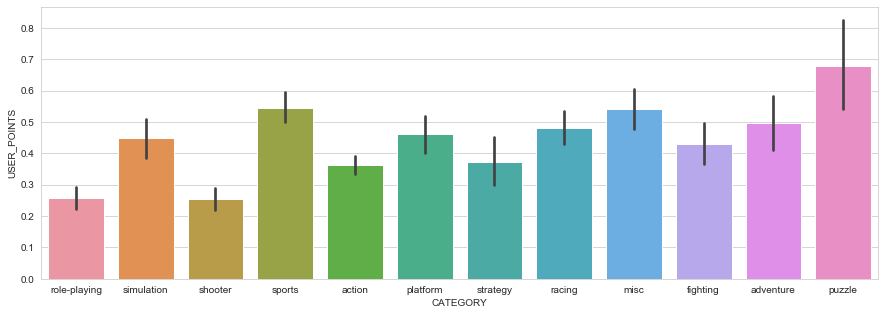

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x=train['CATEGORY'],y=train['USER_POINTS'])

##### From the Sales vs Category plot we had observed that sales for shooter category was highest.However from the above graph we can see that user points for shooter category is least.This shows that even though customers purshase consoles with shooter category they are not having a satisfactory experience.On the other hand puzzle category of consoles has rreceived highest user_points.

##### Which rating was common for a particular category of console?

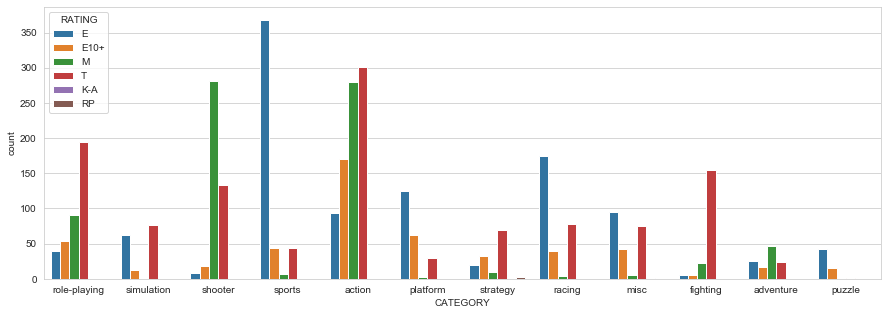

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(train['CATEGORY'],hue=train['RATING'])

##### Most of the categories have either E or T as their rating.This shows that for most of the consoles target age group is 13+ years or 6+ years

##### Most popular category in each year

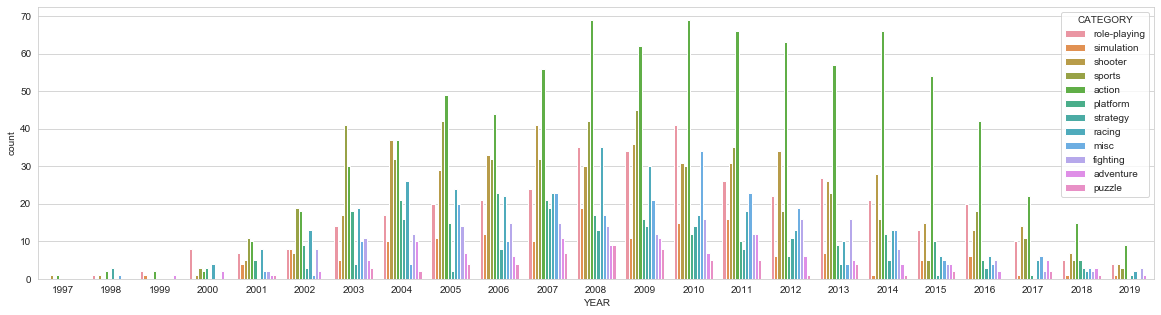

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(train['YEAR'],hue=train['CATEGORY'])

##### Action category was popular in the period from 2008 to 2015 but there was a decline in its popularity from 2016.Also there is a general increase in the popularity of consoles as we go from 2000 to 2014 and then there is decline in the popularity of these categories.

##### Which category gaming consoles  were published the most?

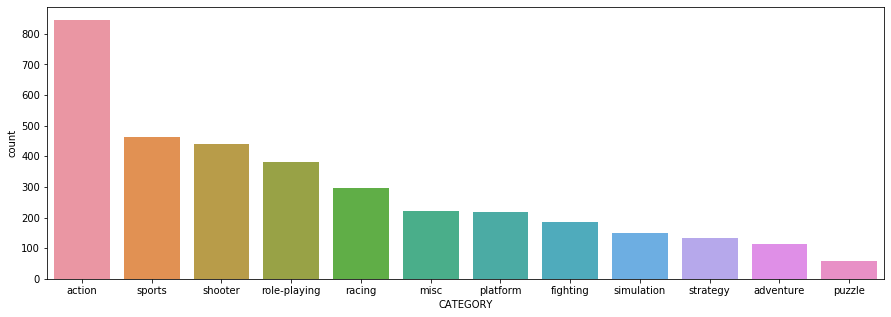

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(train['CATEGORY'],order=train['CATEGORY'].value_counts().index)

##### Action category gaming consoles were  published the most

##### Which year saw the  highest publications for gaming consoles

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text xticklabel objects>)

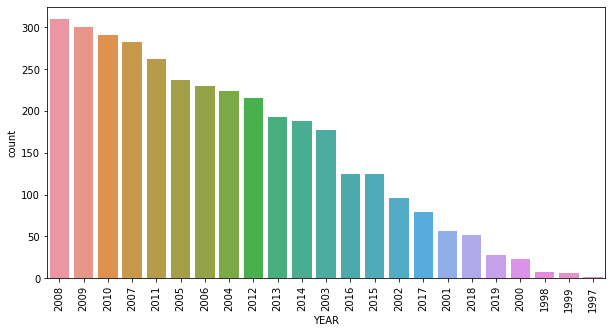

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(train['YEAR'],order=train['YEAR'].value_counts().index)
plt.xticks(rotation=90)

##### 2008 saw the highest number of publications in gaming console.

##### Which categories were popular in the top 5 years of publications?

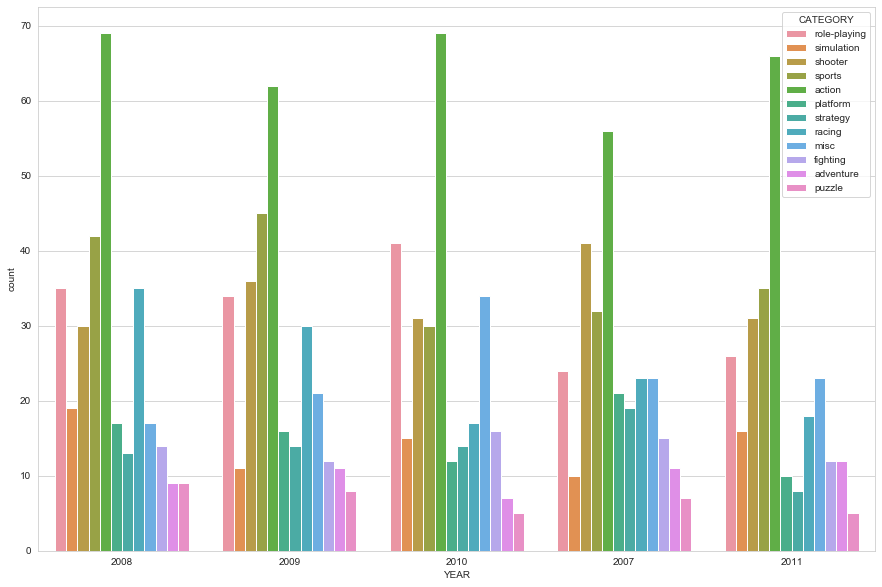

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(train['YEAR'],hue=train['CATEGORY'],order=train['YEAR'].value_counts().index[:5])

##### Most popular category in all top 5 years was action

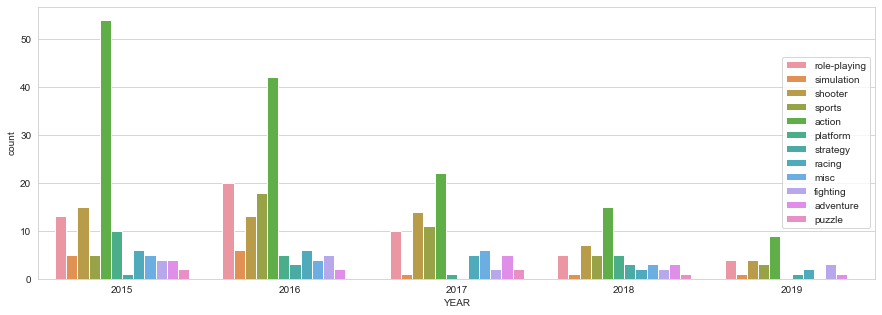

In [62]:
plt.figure(figsize=(15,5))
sns.countplot(train['YEAR'],hue=train['CATEGORY'],order=np.sort(train['YEAR'].unique())[-5:])
plt.legend(loc='right')

##### In 2015 action was the most popular category and the trend continued.The popularity of other categories was very low in 2015.But from 2016 all categories saw a huge drop in their overall popularity.The popularity of gaming consoles dropped to a very low value in 2019 

##### Top 10 Publishers

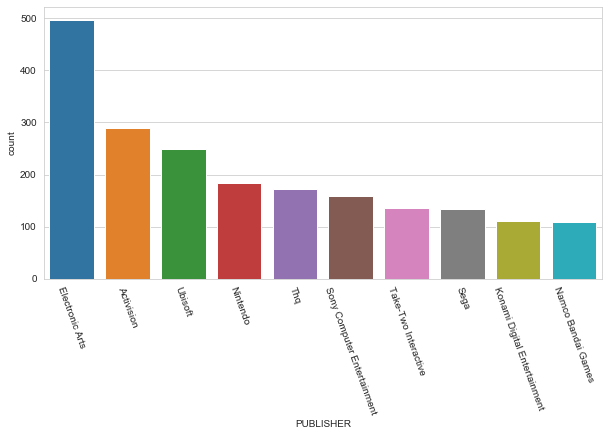

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(train['PUBLISHER'],order=train['PUBLISHER'].value_counts().index[:10])
plt.xticks(rotation=-70)
plt.show()

##### Electronics Art is the most popular gaming console with a very high margin above other consoles. 